In [1]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

In [12]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [17]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.3 MB/s eta 0:00:00


In [13]:
text = "Barack Obama was born in Hawaii and served as the 44th President of the United States."

In [14]:
words = word_tokenize(text)
tagged_words = pos_tag(words)
named_entities = ne_chunk(tagged_words)

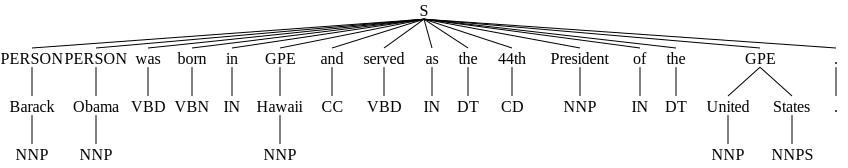

In [18]:
named_entities

In [20]:
named_entities.pprint()

(S
  (PERSON Barack/NNP)
  (PERSON Obama/NNP)
  was/VBD
  born/VBN
  in/IN
  (GPE Hawaii/NNP)
  and/CC
  served/VBD
  as/IN
  the/DT
  44th/CD
  President/NNP
  of/IN
  the/DT
  (GPE United/NNP States/NNPS)
  ./.)


"Critical words" -> words or terms that are essential for understanding or identifying a particular concept or entity within a given context.

For example, in the sentence "Barack Obama was born in Hawaii and served as the 44th President of the United States," the critical words for identifying the named entity "Barack Obama" would include "Barack" and "Obama." These words are crucial because they directly represent the name of the person being identified as a named entity.

In [21]:
critical_words = []

In [22]:
for entity in named_entities:
  if isinstance(entity, nltk.Tree):
    critical_words.extend([word for word, tag in entity.leaves()])

In [23]:
critical_words

['Barack', 'Obama', 'Hawaii', 'United', 'States']

### We can also -> Use attention heads for capturing the importance

In [25]:
!pip install transformers

In [91]:
from transformers import BertModel, BertConfig, BertTokenizer
import torch

In [92]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [93]:
config = BertConfig.from_pretrained('bert-base-uncased',
output_hidden_states=True, output_attentions=True)
bert_model = BertModel.from_pretrained('bert-base-uncased',
config=config)

In [94]:
text = "Barack Obama was born in Hawaii and served as the 44th President of the United States."

In [95]:
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [96]:
outputs = bert_model(torch.tensor([token_ids]))

In [97]:
len(outputs.attentions)

12

In [98]:
attention_scores = outputs.attentions[0][0]
attention_scores.shape

torch.Size([12, 17, 17])

In [99]:
test_attention = attention_scores.mean(dim=1).squeeze()
test_attention.shape

torch.Size([12, 17])

In [100]:
summed_attention = test_attention.sum(dim=0)
summed_attention

tensor([1.2210, 0.8134, 0.5529, 0.9993, 0.5254, 0.8396, 0.5475, 0.8511, 0.5329,
        0.5091, 0.7903, 0.7933, 0.5661, 0.4941, 0.7189, 0.7766, 0.4686],
       grad_fn=<SumBackward1>)

In [101]:
average_attention = summed_attention / 17
average_attention

tensor([0.0718, 0.0478, 0.0325, 0.0588, 0.0309, 0.0494, 0.0322, 0.0501, 0.0313,
        0.0299, 0.0465, 0.0467, 0.0333, 0.0291, 0.0423, 0.0457, 0.0276],
       grad_fn=<DivBackward0>)

In [102]:
token_attention_dict = dict(zip(tokens, average_attention.tolist()))

In [103]:
token_attention_dict

{'barack': 0.07182391732931137,
 'obama': 0.047847773879766464,
 'was': 0.03252127766609192,
 'born': 0.05878366529941559,
 'in': 0.030907686799764633,
 'hawaii': 0.049386341124773026,
 'and': 0.032205309718847275,
 'served': 0.05006401613354683,
 'as': 0.03134636953473091,
 'the': 0.029063189402222633,
 '44th': 0.04648760333657265,
 'president': 0.04666176810860634,
 'of': 0.03329974785447121,
 'united': 0.04229064658284187,
 'states': 0.045681118965148926,
 '.': 0.027566632255911827}

In [104]:
sorted_tokens = sorted(token_attention_dict.items(), key=lambda x: x[1], reverse=True)
for token, attention in sorted_tokens:
    print(f"{token}: {attention}")

barack: 0.07182391732931137
born: 0.05878366529941559
served: 0.05006401613354683
hawaii: 0.049386341124773026
obama: 0.047847773879766464
president: 0.04666176810860634
44th: 0.04648760333657265
states: 0.045681118965148926
united: 0.04229064658284187
of: 0.03329974785447121
was: 0.03252127766609192
and: 0.032205309718847275
as: 0.03134636953473091
in: 0.030907686799764633
the: 0.029063189402222633
.: 0.027566632255911827
